In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr


In [2]:
div_df_orginal = pd.read_csv('dividend_stocks_only.csv')

In [3]:
div_df = div_df_orginal.copy()

In [4]:
div_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [5]:
div_df.isna().sum()

symbol                            0
security_name                     0
listing_exchange                  0
etf                               0
financial_status               1305
zip                              20
sector                           13
fullTimeEmployees               569
city                              2
state                           157
country                           0
industry                         13
twoHundredDayAverage              0
trailingAnnualDividendYield     170
averageDailyVolume10Day           0
regularMarketPreviousClose        0
open                              0
averageVolume10days               0
dividendRate                      0
regularMarketVolume               0
marketCap                        17
averageVolume                     0
dayLow                            0
ask                               0
fiftyTwoWeekHigh                  0
forwardPE                       588
fiveYearAvgDividendYield        428
dividendYield               

In [6]:
div_df.shape

(1939, 40)

In [7]:
div_df.drop(['revenueQuarterlyGrowth','financial_status'],axis=1,inplace = True)

In [8]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [9]:
div_df.columns

Index(['symbol', 'security_name', 'listing_exchange', 'etf', 'zip', 'sector',
       'fullTimeEmployees', 'city', 'state', 'country', 'industry',
       'twoHundredDayAverage', 'trailingAnnualDividendYield',
       'averageDailyVolume10Day', 'regularMarketPreviousClose', 'open',
       'averageVolume10days', 'dividendRate', 'regularMarketVolume',
       'marketCap', 'averageVolume', 'dayLow', 'ask', 'fiftyTwoWeekHigh',
       'forwardPE', 'fiveYearAvgDividendYield', 'dividendYield', 'bidSize',
       'dayHigh', 'enterpriseToRevenue', 'forwardEps', 'bookValue',
       'sharesShort', 'shortRatio', 'floatShares', 'enterpriseValue',
       'regularMarketPrice', 'latest_dividend'],
      dtype='object')

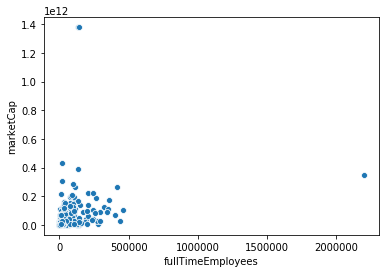

In [10]:
sns.scatterplot(data = div_df,x=div_df['fullTimeEmployees'],y=div_df['marketCap'])

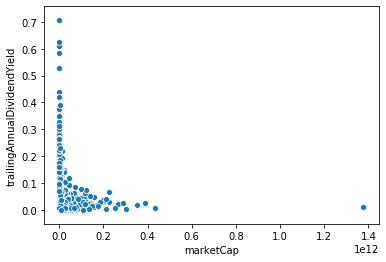

In [11]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['trailingAnnualDividendYield'])

In [12]:
div_df['etf'].unique()

array(['N'], dtype=object)

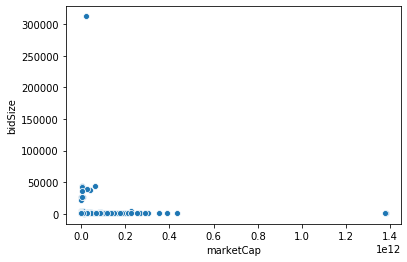

In [13]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['bidSize'])

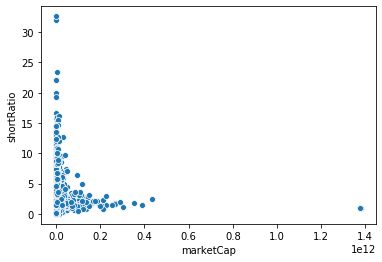

In [14]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['shortRatio'])

In [15]:
div_df.isna().sum()

symbol                           0
security_name                    0
listing_exchange                 0
etf                              0
zip                             20
sector                          13
fullTimeEmployees              569
city                             2
state                          157
country                          0
industry                        13
twoHundredDayAverage             0
trailingAnnualDividendYield    170
averageDailyVolume10Day          0
regularMarketPreviousClose       0
open                             0
averageVolume10days              0
dividendRate                     0
regularMarketVolume              0
marketCap                       17
averageVolume                    0
dayLow                           0
ask                              0
fiftyTwoWeekHigh                 0
forwardPE                      588
fiveYearAvgDividendYield       428
dividendYield                    1
bidSize                          0
dayHigh             

In [16]:
# Remove outliers from dataset

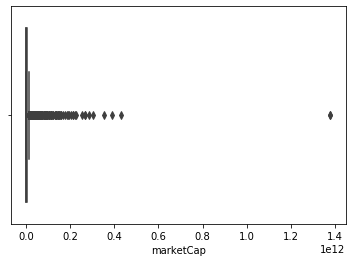

In [17]:
sns.boxplot(x= div_df['marketCap'])

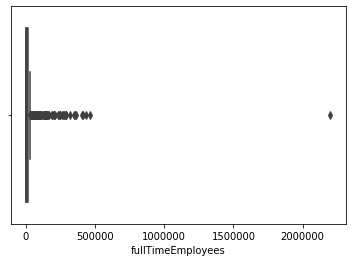

In [18]:
sns.boxplot(x= div_df['fullTimeEmployees'])

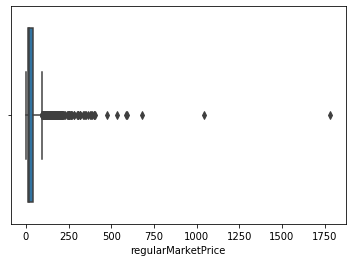

In [19]:
sns.boxplot(x= div_df['regularMarketPrice'])

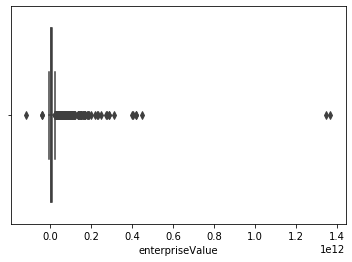

In [20]:
sns.boxplot(x= div_df['enterpriseValue'])

In [21]:
# One thing I may think of doing is filling in the null values with data before removing outliers.

In [22]:
# Get max and min full time employees
print(div_df['fullTimeEmployees'].min())
print(div_df['fullTimeEmployees'].max())

1.0
2200000.0


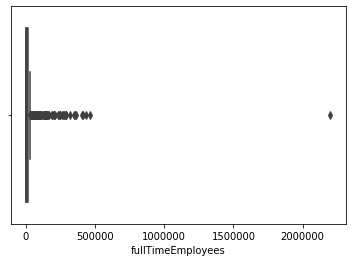

In [24]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [25]:
div_df = div_df[div_df.fullTimeEmployees != 2200000]

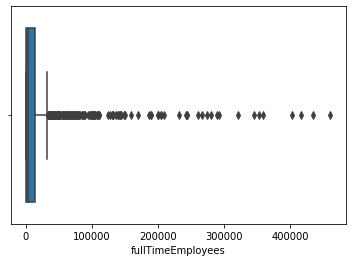

In [26]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [27]:
div_df['fullTimeEmployees'].fillna(value=np.random.uniform(1,100000), inplace=True)

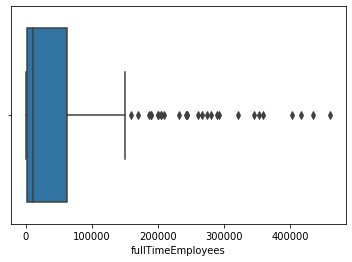

In [28]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [31]:
iqr(div_df['fullTimeEmployees'])

61270.02587833846

In [32]:
div_df['fullTimeEmployees'].describe()

count      1938.000000
mean      30747.175297
std       43025.439062
min           1.000000
25%        1300.000000
50%       10500.000000
75%       62570.025878
max      460724.000000
Name: fullTimeEmployees, dtype: float64

In [ ]:
# Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR

In [37]:
Q1fte = div_df['fullTimeEmployees'].quantile(0.25)
Q3fte = div_df['fullTimeEmployees'].quantile(0.75)
IQR = Q3fte-Q1fte

In [40]:
print(div_df['fullTimeEmployees'] < (Q1fte - 1.5 * IQR))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1909    False
1910    False
1911    False
1912    False
1913    False
1914    False
1915    False
1916    False
1917    False
1918    False
1919    False
1920    False
1921    False
1922    False
1923    False
1924    False
1925    False
1926    False
1927    False
1928    False
1929    False
1930    False
1931    False
1932    False
1933    False
1934    False
1935    False
1936    False
1937    False
1938    False
Name: fullTimeEmployees, Length: 1938, dtype: bool
